Error entrenamiento:  0.9966611903407159
Error generalización:  0.9966105284571961


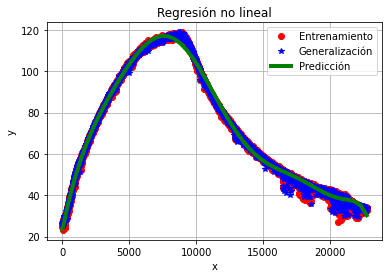

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score



opc=4

# Grado del polinomio para primeros tres ejercicios
dpol=1
alpha=0.0
#seleccionamos  como menu la opcion que queremos de los siguientes casos
if opc == 1:
  # Extraemos vectores
  df = pd.read_csv('df_regresion_nolineal_1.cvs')
  x=np.asanyarray(df[['x']])
  y=np.asanyarray(df[['y']])
elif opc==2:
  # Extraemos vectores
  df = pd.read_csv('df_regresion_nolineal_2.cvs')
  x=np.asanyarray(df[['x']])
  y=np.asanyarray(df[['y']])
elif opc==3:
  # Extraemos vectores
  df = pd.read_csv('df_regresion_nolineal_3.cvs')
  x=np.asanyarray(df[['x']])
  y=np.asanyarray(df[['y']])
else:
  # Cambiamos el grado del polinomio del cuarto ejercicio
  dpol=9 #5,10,9,8
  alpha=0.0
  # Extraemos vectores
  df = pd.read_csv('df_regresion_nolineal_temp.cvs')
  x=np.asanyarray(df[['time']])
  y=np.asanyarray(df[['temp']])


  # Obtenemos datos de entrenamiento y de generalización
  x_ent, x_gen, y_ent, y_gen = train_test_split(x,y)
  # Modelo de regresión no lineal
  model = Pipeline([('poly',PolynomialFeatures(degree=dpol)),('scaler',StandardScaler()),('reg',Ridge(alpha))])
  model.fit(x_ent,y_ent)
  # Se imprime en pantalla el error de valores de entrenemiento y error de valores de generalización
  print('Error entrenamiento: ',model.score(x_ent,y_ent))
  print('Error generalización: ',model.score(x_gen,y_gen))






# Imprimelas gráficas
x_plot=np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_plot = model.predict(x_plot)
plt.figure()
plt.grid()
plt.title('Regresión no lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_ent,y_ent,'ro')
plt.plot(x_gen,y_gen,'b*')
plt.plot(x_plot,y_plot,'g-',lw=4)

plt.legend(['Entrenamiento','Generalización','Predicción'])
plt.show()



